### Задача 1: Загрузка и первичный анализ данных

In [2]:
import matplotlib.pyplot as pt
import pandas as pd
import seaborn as sb
# Импорт необходимых библиотек

C:\Users\danil\AppData\Local\Temp\ipykernel_35272\2121542207.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [11]:
train =  pd.read_csv('./files/train.csv')
train.loc['PassengerId', 'Age']
#Вывод первых десяти столбцов из таблицы train

KeyError: 'PassengerId'

In [26]:
train_shape = train.shape

print(f"Количество Строк gender_submission: {train_shape[0]}\n\n")
print(f"Количество Столбцов gender_submission: {train_shape[1]}\n\n")
print(f'Размерность таблицы: {train_shape[0] * train_shape[1]}\n\n')
print(f"Количество пустых значений в каждом столбце и типы данных:\n", train.isnull().sum(), sep='')
#Определите размерность данных, количество пустых значений в каждом столбце и типы данных.
train.dtypes

Количество Строк gender_submission: 891


Количество Столбцов gender_submission: 12


Размерность таблицы: 10692


Количество пустых значений в каждом столбце и типы данных:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [27]:
# Удаляем колонки, в которых все значения уникальны  не повторяются

for column in train.columns:
    if len(train[column].unique()) == len(train):
        train = train.drop(columns=[column])
train = train.drop(columns="Parch")
train

,Survived,Pclass,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,113803,53.1000,C123,S
4,0,3,male,35.0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,111369,30.0000,C148,C


In [35]:
mid_age = (train.Age.sum() / len(train)).round(1)

train.Age = train.Age.fillna(mid_age)
if train[]
train
#Заполнение пропущенных значений в столбце возраста (например, медианным значением возраста)

,Survived,Pclass,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
0,0,3,0,22.0,1,A/5 21171,7.2500,NaN,S
1,1,1,1,38.0,1,PC 17599,71.2833,C85,C
2,1,3,1,26.0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,1,35.0,1,113803,53.1000,C123,S
4,0,3,0,35.0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,211536,13.0000,NaN,S
887,1,1,1,19.0,0,112053,30.0000,B42,S
888,0,3,1,23.8,1,W./C. 6607,23.4500,NaN,S
889,1,1,0,26.0,0,111369,30.0000,C148,C


In [38]:

train["Sex"].replace(['male', 'female'], [0, 1], inplace=True)

train
#Преобразуйте категориальные переменные в числовые (например, пол пассажиров)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


<Axes: >

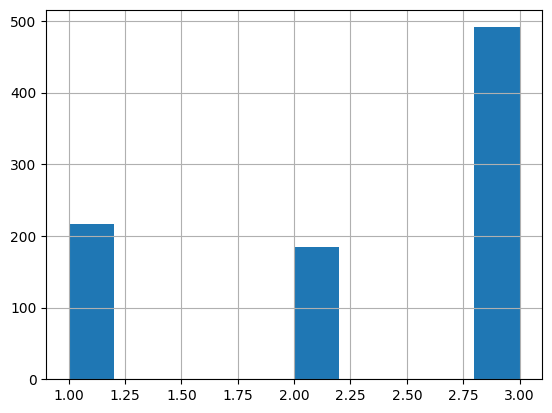

In [16]:
train.Pclass.hist()
# График

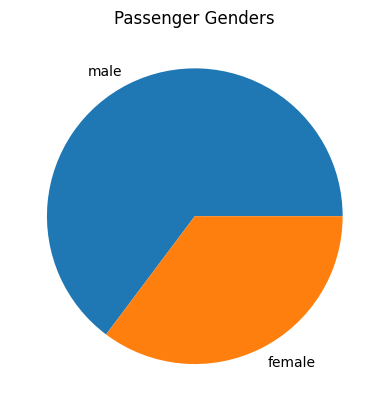

In [40]:
train_sex = list(train.Sex)

male = train_sex.count(0)
female = train_sex.count(1)

values = [male, female]
labels = ['male', 'female']



pt.pie(values, labels=labels)
pt.title('Passenger Genders')
pt.show()
# График

In [43]:
train.to_csv('train3.csv', index=False, sep=';')

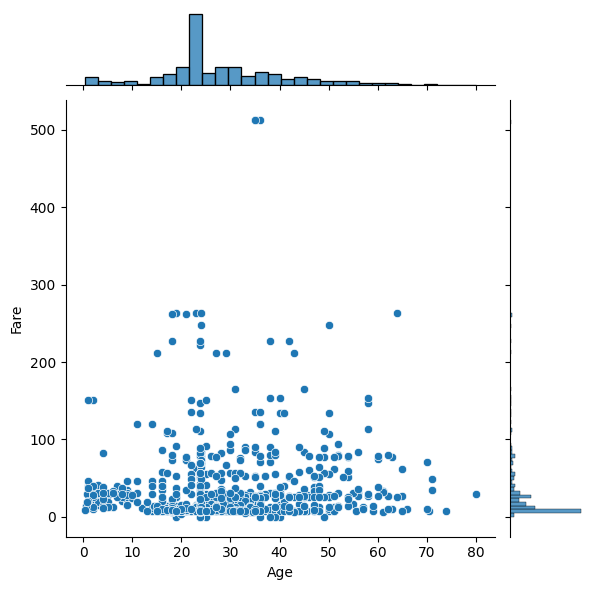

In [19]:
sb.jointplot(x='Age', y='Fare', data=train) 
# График